<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

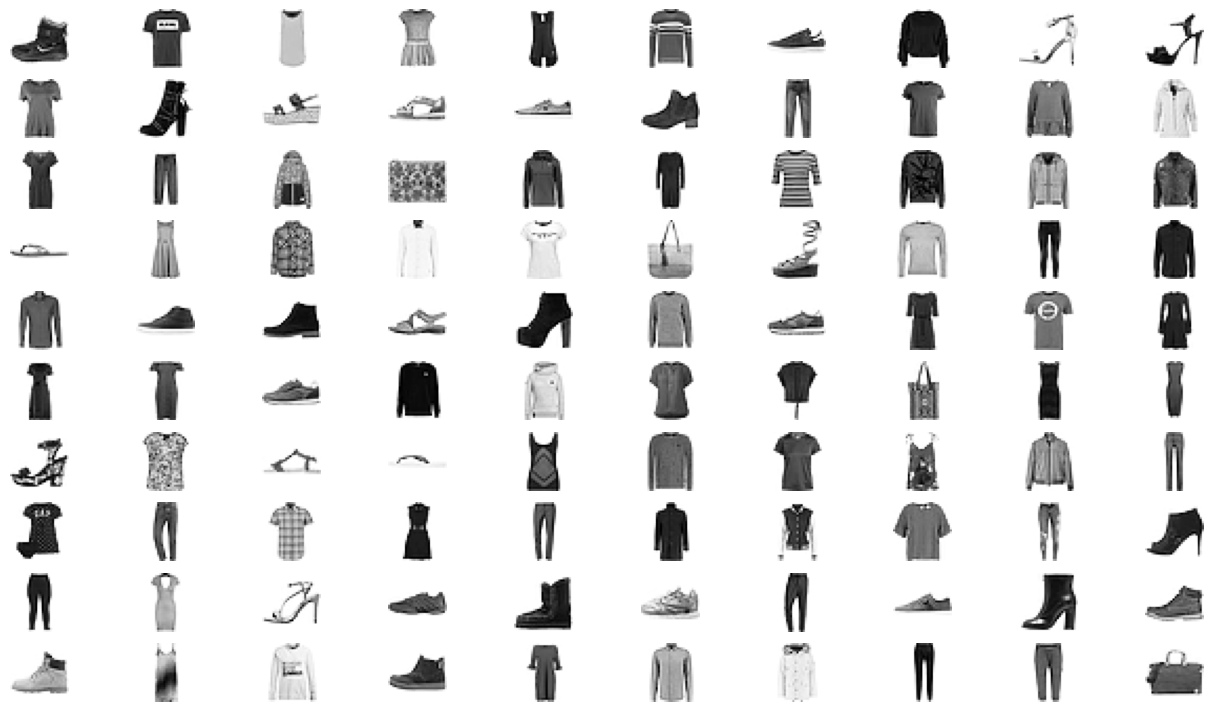

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

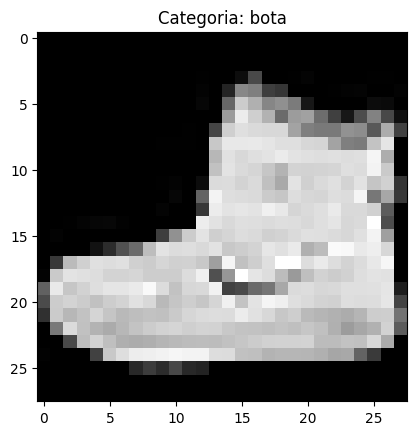

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='gray')
plt.title("Categoria: " + category_list[data_y_train[0]])
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
img_medio = data_X_train[14]
img_medio

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,  69,  35,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         34, 160, 128, 191, 114,   0,   0,   0,   0,   0,   0,   0, 107,
         59,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   5,  48, 126,
        151, 160, 172, 113, 130,  61,   0,   0,   0,   0,  51, 201, 245,
        166,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,  30, 164, 166, 136,
        119, 101,  88, 165, 149, 141, 116,  97,  92, 132, 162, 141, 233,
        210,   0],
       [  0,   0,   0,   0,   2,  14,  34,  64,  82, 119, 135,  88, 136,
        122, 206, 190, 122, 122, 116, 144, 145, 151, 144, 140, 151, 159,
        182,  11],
       [  0,   2,  42,  72,  90, 105, 115, 102, 106, 120,  93, 149, 131,
         99, 185, 198,  94,  94, 105,  97, 113, 102, 114, 123, 107,  93,
        147,  31],
       [ 92, 228, 130, 109,  95,  86,  85,  73,  94,  85, 103, 102,  65,
         74,  77,  78,  90,  97, 107, 114, 114, 123, 144, 139, 136, 157,
        189,  31],
       [ 19,  88, 141, 173, 173, 173, 161, 170, 203, 198, 205, 215, 224,
        227, 230, 245, 255, 252, 248, 252, 239, 228, 216, 214, 214, 208,
        231,  82],
       [ 14,   0,   0,   0,   0,   0,   0,   0,   5,   3,  10,   5,   6,
         14,  14,  11,   6,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  13],
       [  0,  14,  28,  31,  28,  24,  27,  24,  24,  23,  30,  22,  19,
         21,  21,  22,  23,  23,  24,  26,  28,  35,  39,  36,  36,  38,
         44,  22],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [7]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_normalizado = data_X_train / 255
X_test_normalizado = data_X_test / 255


In [8]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
X_train_normalizado.shape[0]

60000

In [9]:
# Alumno: Imprimir la dimension de la imagen
X_train_normalizado[0].shape

(28, 28)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

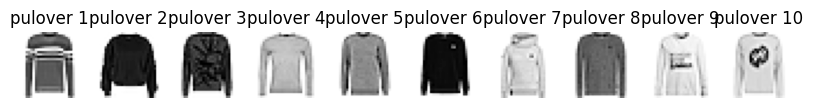

In [10]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
pullover_indices = np.where(data_y_train == 2)[0]

# Seleccionar los primeros diez púlovers
first_ten_pullovers = data_X_train[pullover_indices[:10]]

# Crear una figura para mostrar las imágenes
fig = plt.figure(figsize=(10, 2))

# Mostrar las imágenes de los primeros diez púlovers
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    plt.imshow(first_ten_pullovers[i], cmap='Greys')
    plt.title(f'{category_list[2]} {i+1}')

plt.show()

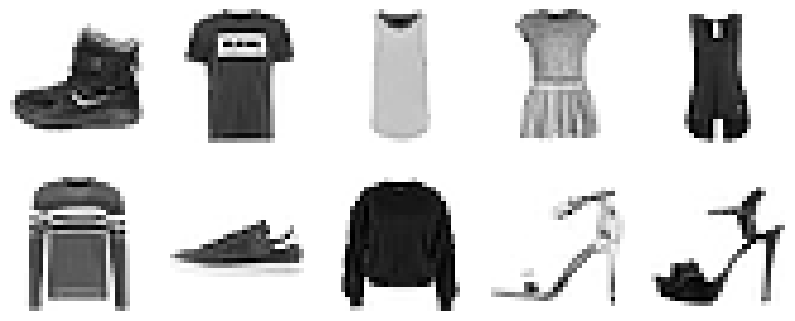

In [11]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig, axs = plt.subplots(2, 5, figsize=(10, 4))

# Iterar sobre los primeros diez ejemplos
for i in range(10):
    # Seleccionar el índice de la imagen y su etiqueta
    image_index = i
    image = data_X_train[image_index]
    label = data_y_train[image_index]


    # Mostrar la imagen en la subfigura correspondiente
    axs[i // 5, i % 5].imshow(image, cmap='Greys')
    axs[i // 5, i % 5].axis('off')

# Eliminar las subfiguras vacías
for i in range(10, 10):
    fig.delaxes(axs.flatten()[i])

plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [12]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

numero_pixeles = X_train_normalizado.shape[1] * X_train_normalizado.shape[2]

X_train = X_train_normalizado.reshape(X_train_normalizado.shape[0], numero_pixeles).astype('float32')
X_test = X_test_normalizado.reshape(X_test_normalizado.shape[0], numero_pixeles).astype('float32')


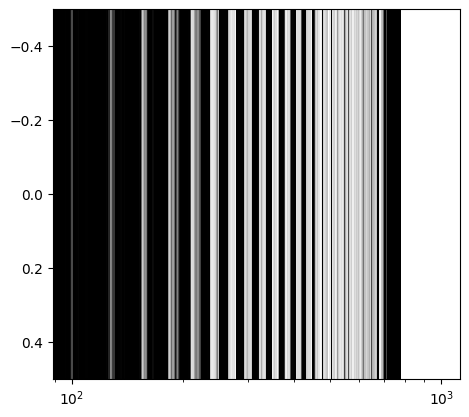

In [13]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')
ax.set_xscale("log")
plt.show()

In [14]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [15]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [20]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

In [17]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [21]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [42]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion
model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 64)                4160      
                                                                 
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 64)               

In [34]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.6757 - accuracy: 0.7516 - val_loss: 0.4824 - val_accuracy: 0.8198
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4334 - accuracy: 0.8436 - val_loss: 0.4205 - val_accuracy: 0.8489
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3802 - accuracy: 0.8605 - val_loss: 0.3984 - val_accuracy: 0.8496
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3490 - accuracy: 0.8734 - val_loss: 0.3609 - val_accuracy: 0.8711
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3295 - accuracy: 0.8788 - val_loss: 0.3651 - val_accuracy: 0.8668
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3091 - accuracy: 0.8856 - val_loss: 0.3563 - val_accuracy: 0.8726
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2973 - accuracy: 0.8884 - val_loss: 0.3594 - val_accuracy: 0.8722
Epoch 

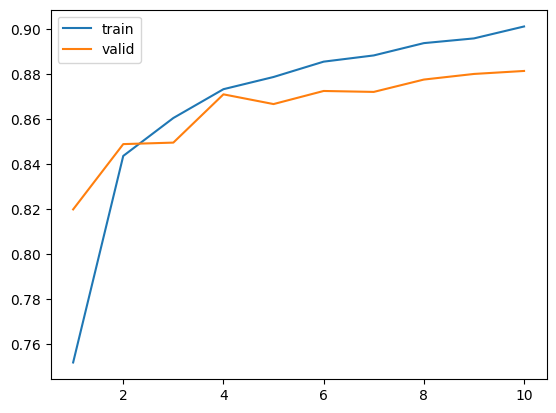

In [35]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [44]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2
model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 128)               100480    
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [45]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 11ms/step - loss: 1.1133 - accuracy: 0.5478 - val_loss: 0.6477 - val_accuracy: 0.7508
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6669 - accuracy: 0.7417 - val_loss: 0.5307 - val_accuracy: 0.7934
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.5622 - accuracy: 0.7928 - val_loss: 0.4994 - val_accuracy: 0.8248
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5148 - accuracy: 0.8230 - val_loss: 0.4427 - val_accuracy: 0.8446
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.4811 - accuracy: 0.8373 - val_loss: 0.4232 - val_accuracy: 0.8532
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4536 - accuracy: 0.8501 - val_loss: 0.4096 - val_accuracy: 0.8593
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4312 - accuracy: 0.8572 - val_loss: 0.4263 - val_accuracy: 0.8533
Epoc

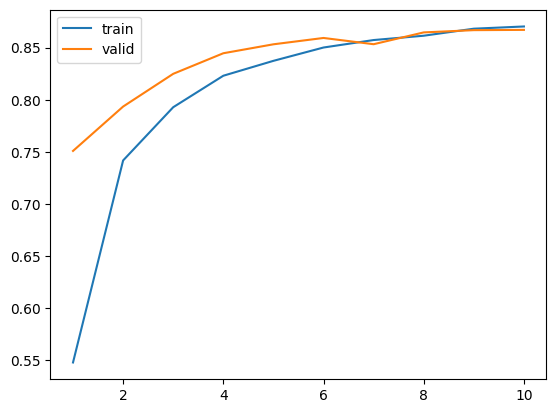

In [46]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [47]:
# Alumno: Predecir las probabilidades del dataset X_test

y_hat_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [48]:
# Alumno: Transformar las probabilidades en y_hat usando argmax

y_hat = np.argmax(y_hat_prob,axis=1)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [49]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)

scores = model.evaluate(X_test, y_test)

scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8601


0.8600999712944031

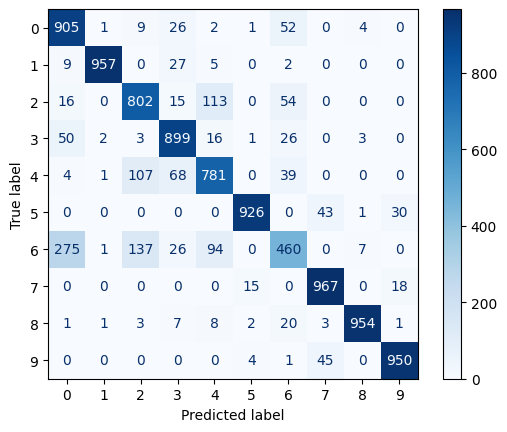

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [51]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [52]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco

X_test_saco = X_test[rank_saco]

y_test_saco = y_test[rank_saco]

In [55]:
# Alumno: Calcular la exactitud de los sacos seleccionados

score = model.evaluate(X_test_saco, y_test_saco)

score

1/1 [==============================] - 0s 45ms/step - loss: 2.7011 - accuracy: 0.0000e+00


0.0

In [56]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_prob_saco = model.predict(X_test_saco)
y_hat_saco = np.argmax(y_hat_prob_saco,axis=1)

y_hat_saco

1/1 [==============================] - 0s 69ms/step


array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

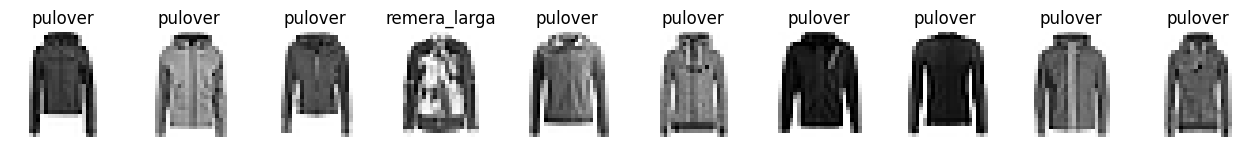

In [57]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))

j = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_normalizado[i], cmap='Greys')
    ax.set_title(category_list[y_hat_saco[j]])
    j += 1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)